### Import avian bird flu data

In [2]:
import pandas as pd

bird_flu = pd.read_csv('bird flu.csv')
bird_flu.head()
bird_flu['Outbreak Date'] = pd.to_datetime(bird_flu['Outbreak Date'])


bird_flu = bird_flu.groupby(bird_flu["Outbreak Date"].dt.to_period("M"))["Outbreaks"].sum().reset_index()
bird_flu["Outbreak Date"] = bird_flu["Outbreak Date"].astype(str)


bird_flu.head()

,Outbreak Date,Outbreaks
0,2022-02,8
1,2022-03,56
2,2022-04,68
3,2022-05,56
4,2022-06,14


### Initialize X and add avian bird flu data

In [3]:
X = pd.DataFrame()
X['Year-Month'] = bird_flu['Outbreak Date']
X['Outbreaks'] = bird_flu['Outbreaks']

# Rename Outbreaks to Avian Outbreaks
X.rename(columns={'Outbreaks': 'Avian Outbreaks'}, inplace=True)

print(X.head())

  Year-Month  Avian Outbreaks
0    2022-02                8
1    2022-03               56
2    2022-04               68
3    2022-05               56
4    2022-06               14


### Import and initialize y

In [4]:
prices = pd.read_excel("grade a egg prices.xlsx", sheet_name="Monthly")

# Display the first few rows of the DataFrame
prices.head()
y = prices.rename(columns={"APU0000708111": "price"})
y.head()

# Convert observation_date to datetime format
y['observation_date'] = pd.to_datetime(y['observation_date'])
y['Year-Month'] = y['observation_date'].dt.to_period('M')
y = y[['Year-Month', 'price']].dropna()
y.head()

,Year-Month,price
0,1980-01,0.879
1,1980-02,0.774
2,1980-03,0.812
3,1980-04,0.797
4,1980-05,0.737


### Bacon prices

In [5]:
bacon_prices = pd.read_excel("bacon prices.xlsx", sheet_name="Monthly")

# Rename the second column to "bacon price"
bacon_prices = bacon_prices.rename(columns={bacon_prices.columns[1]: "bacon price"})
bacon_prices.head()

# Convert the observation date to datetime format
bacon_prices["observation_date"] = pd.to_datetime(bacon_prices["observation_date"])

# Group by year and month, and calculate the mean bacon price
bacon_prices["year_month"] = bacon_prices["observation_date"].dt.to_period("M")
bacon_prices_grouped = bacon_prices.groupby("year_month")["bacon price"].mean().reset_index()
bacon_prices_grouped.head()

,year_month,bacon price
0,1980-01,1.453
1,1980-02,1.410
2,1980-03,1.361
3,1980-04,1.323
4,1980-05,1.266


In [6]:
# Concat X and bacon_prices_grouped on Year-Month
X = pd.concat([X, bacon_prices_grouped], axis=1)
# Drop year_month column from X
X = X.drop(columns=["year_month"])
X.head()

,Year-Month,Avian Outbreaks,bacon price
0,2022-02,8.0,1.453
1,2022-03,56.0,1.410
2,2022-04,68.0,1.361
3,2022-05,56.0,1.323
4,2022-06,14.0,1.266


### Commerical Backyard Flocks

In [7]:
commercial_backyard_flocks = pd.read_csv("commercial-backyard-flocks.csv")
commercial_backyard_flocks.head()

# Convert the date column to datetime format
commercial_backyard_flocks['date'] = pd.to_datetime(commercial_backyard_flocks['Outbreak Date'])

# Group by year and month, and calculate the mean number of commercial backyard flocks
commercial_backyard_flocks['year_month'] = commercial_backyard_flocks['date'].dt.to_period('M')
commercial_backyard_flocks_grouped = commercial_backyard_flocks.groupby('year_month')['Flock Size'].sum().reset_index()
commercial_backyard_flocks_grouped.head()

,year_month,Flock Size
0,2022-02,1487328
1,2022-03,20958587
2,2022-04,14686259
3,2022-05,783375
4,2022-06,2173327


In [8]:
# Concat X and commercial_backyard_flocks_grouped on Year-Month
X = pd.concat([X, commercial_backyard_flocks_grouped], axis=1)
# Drop year_month column from X
X = X.drop(columns=["year_month"])
X.head()

,Year-Month,Avian Outbreaks,bacon price,Flock Size
0,2022-02,8.0,1.453,1487328.0
1,2022-03,56.0,1.410,20958587.0
2,2022-04,68.0,1.361,14686259.0
3,2022-05,56.0,1.323,783375.0
4,2022-06,14.0,1.266,2173327.0


### Cage free

In [9]:
cage_free = pd.read_csv('cage-free-percentages.csv')
cage_free.dropna()
cage_free['observed_month'] = pd.to_datetime(cage_free['observed_month'])
cage_free = cage_free.groupby(cage_free['observed_month'].dt.to_period('M'))['percent_eggs'].sum().reset_index()
cage_free

,observed_month,percent_eggs
0,2007-12,0.000000
1,2008-12,0.000000
2,2009-12,0.000000
3,2010-12,0.000000
4,2011-12,0.000000
...,...,...
60,2020-10,23.923739
61,2020-11,23.826924
62,2020-12,23.899118
63,2021-01,24.388197


In [10]:
# Concat X and cage_free on observed_month and Year-Month
X = pd.concat([X, cage_free], axis=1)
# Drop observed_month column from X
X = X.drop(columns=["observed_month"])
X.head()

,Year-Month,Avian Outbreaks,bacon price,Flock Size,percent_eggs
0,2022-02,8.0,1.453,1487328.0,0.0
1,2022-03,56.0,1.410,20958587.0,0.0
2,2022-04,68.0,1.361,14686259.0,0.0
3,2022-05,56.0,1.323,783375.0,0.0
4,2022-06,14.0,1.266,2173327.0,0.0


### Egg production

In [11]:
# Import egg production data
egg_production = pd.read_csv("egg-production.csv")
egg_production.head()

# Convert the date column to datetime format
egg_production['observed_month'] = pd.to_datetime(egg_production['observed_month'])

# Group by year and month, and calculate the mean number of eggs produced
egg_production['year_month'] = egg_production['observed_month'].dt.to_period('M')
egg_production.head()
egg_production_grouped = egg_production.groupby('year_month')['n_hens'].sum().reset_index()
egg_production_grouped.head()

,year_month,n_hens
0,2016-07,357644000
1,2016-08,389012000
2,2016-09,390931000
3,2016-10,400309000
4,2016-11,405444000


In [12]:
# Merge the two DataFrames on Year-Month
X = pd.concat([X, egg_production_grouped], axis=1)
# Drop year_month column from X
X = X.drop(columns=["year_month"])
X.head()

,Year-Month,Avian Outbreaks,bacon price,Flock Size,percent_eggs,n_hens
0,2022-02,8.0,1.453,1487328.0,0.0,357644000.0
1,2022-03,56.0,1.410,20958587.0,0.0,389012000.0
2,2022-04,68.0,1.361,14686259.0,0.0,390931000.0
3,2022-05,56.0,1.323,783375.0,0.0,400309000.0
4,2022-06,14.0,1.266,2173327.0,0.0,405444000.0


### Milk Prices

In [13]:
# Import milk prices data
milk_prices = pd.read_excel("milk prices.xlsx", sheet_name="Monthly")
milk_prices.head()

# Rename the second column to "milk price"
milk_prices = milk_prices.rename(columns={milk_prices.columns[1]: "milk price"})
milk_prices.head()

# Convert the date column to datetime format
milk_prices['observation_date'] = pd.to_datetime(milk_prices['observation_date'])

# Group by year and month, and calculate the mean milk price
milk_prices['year_month'] = milk_prices['observation_date'].dt.to_period('M')
milk_prices_grouped = milk_prices.groupby('year_month')['milk price'].mean().reset_index()
milk_prices_grouped.head()

,year_month,milk price
0,1980-01,0.886
1,1980-02,0.887
2,1980-03,0.898
3,1980-04,0.906
4,1980-05,0.919


In [14]:
# Merge X with milk_prices_grouped on Year-Month
X = pd.concat([X, milk_prices_grouped], axis=1)
# Drop year_month column from X
X = X.drop(columns=["year_month"])
X.head()

,Year-Month,Avian Outbreaks,bacon price,Flock Size,percent_eggs,n_hens,milk price
0,2022-02,8.0,1.453,1487328.0,0.0,357644000.0,0.886
1,2022-03,56.0,1.410,20958587.0,0.0,389012000.0,0.887
2,2022-04,68.0,1.361,14686259.0,0.0,390931000.0,0.898
3,2022-05,56.0,1.323,783375.0,0.0,400309000.0,0.906
4,2022-06,14.0,1.266,2173327.0,0.0,405444000.0,0.919


### Potato Prices

In [15]:
# Import potato prices data
potato_prices = pd.read_excel("potato prices.xlsx", sheet_name="Monthly")
potato_prices.head()

# Rename the second column to "potato price"
potato_prices = potato_prices.rename(columns={potato_prices.columns[1]: "potato price"})
potato_prices.head()

# Convert the date column to datetime format
potato_prices['observation_date'] = pd.to_datetime(potato_prices['observation_date'])

# Group by year and month, and calculate the mean potato price
potato_prices['year_month'] = potato_prices['observation_date'].dt.to_period('M')
potato_prices_grouped = potato_prices.groupby('year_month')['potato price'].mean().reset_index()
potato_prices_grouped.head()

,year_month,potato price
0,1986-03,0.207
1,1986-04,0.215
2,1986-05,0.225
3,1986-06,0.256
4,1986-07,0.288


In [16]:
# Merge X with potato_prices_grouped on Year-Month
X = pd.concat([X, potato_prices_grouped], axis=1)
# Drop year_month column from X
X = X.drop(columns=["year_month"])
X.head()

,Year-Month,Avian Outbreaks,bacon price,Flock Size,percent_eggs,n_hens,milk price,potato price
0,2022-02,8.0,1.453,1487328.0,0.0,357644000.0,0.886,0.207
1,2022-03,56.0,1.410,20958587.0,0.0,389012000.0,0.887,0.215
2,2022-04,68.0,1.361,14686259.0,0.0,390931000.0,0.898,0.225
3,2022-05,56.0,1.323,783375.0,0.0,400309000.0,0.906,0.256
4,2022-06,14.0,1.266,2173327.0,0.0,405444000.0,0.919,0.288


### Soybean prices

In [17]:
# Import the soybean prices csv but only rows 16 to 14237, where row 16 is header
soybean_prices = pd.read_csv('soybean-prices-historical-chart-data.csv', skiprows=15, nrows=14222)
soybean_prices.head()

# Rename the second column to "soybean price"
soybean_prices = soybean_prices.rename(columns={soybean_prices.columns[1]: "soybean price"})
soybean_prices.head()

,date,soybean price
0,1968-12-05,2.4375
1,1968-12-06,2.4475
2,1968-12-09,2.4363
3,1968-12-10,2.4375
4,1968-12-11,2.4463


In [18]:
# Rename the column to remove leading/trailing spaces
soybean_prices.rename(columns=lambda x: x.strip(), inplace=True)

# Convert the date column to datetime format
soybean_prices['date'] = pd.to_datetime(soybean_prices['date'])
soybean_prices['year-month'] = soybean_prices['date'].dt.to_period('M')
# Group by year and month, and calculate the mean soybean price
soybean_prices_grouped = soybean_prices.groupby('year-month')['soybean price'].mean().reset_index()
soybean_prices_grouped.head()

,year-month,soybean price
0,1968-12,2.453978
1,1969-01,2.462059
2,1969-02,2.441995
3,1969-03,2.394335
4,1969-04,2.392690


In [19]:
# Merge X and soybean_prices_grouped on Year-Month
X = pd.concat([X, soybean_prices_grouped], axis=1)
# Drop Year-Month column from X
X = X.drop(columns=["year-month"])
X.head()

,Year-Month,Avian Outbreaks,bacon price,Flock Size,percent_eggs,n_hens,milk price,potato price,soybean price
0,2022-02,8.0,1.453,1487328.0,0.0,357644000.0,0.886,0.207,2.453978
1,2022-03,56.0,1.410,20958587.0,0.0,389012000.0,0.887,0.215,2.462059
2,2022-04,68.0,1.361,14686259.0,0.0,390931000.0,0.898,0.225,2.441995
3,2022-05,56.0,1.323,783375.0,0.0,400309000.0,0.906,0.256,2.394335
4,2022-06,14.0,1.266,2173327.0,0.0,405444000.0,0.919,0.288,2.392690


Wheat Prices

In [20]:
#wheat prices are per ton
wheat_prices = pd.read_excel("wheat prices.xlsx")
wheat_prices['Date'] = pd.to_datetime(wheat_prices['Date']).dt.to_period('M')
wheat_prices = wheat_prices.rename(columns = {'$/Ton' : 'wheat price'})
wheat_prices.head()

/var/folders/4j/njttzsjx355flj2y4dyg94080000gn/T/ipykernel_78876/3774887627.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  wheat_prices['Date'] = pd.to_datetime(wheat_prices['Date']).dt.to_period('M')


,Date,wheat price
0,1960-01,59.89
1,1960-02,60.99
2,1960-03,61.73
3,1960-04,60.99
4,1960-05,57.69


In [21]:
# Merge X with potato_prices_grouped on Year-Month
X = pd.concat([X, wheat_prices], axis=1)
X.drop(columns=["Date"], inplace=True)
X.head()

,Year-Month,Avian Outbreaks,bacon price,Flock Size,percent_eggs,n_hens,milk price,potato price,soybean price,wheat price
0,2022-02,8.0,1.453,1487328.0,0.0,357644000.0,0.886,0.207,2.453978,59.89
1,2022-03,56.0,1.410,20958587.0,0.0,389012000.0,0.887,0.215,2.462059,60.99
2,2022-04,68.0,1.361,14686259.0,0.0,390931000.0,0.898,0.225,2.441995,61.73
3,2022-05,56.0,1.323,783375.0,0.0,400309000.0,0.906,0.256,2.394335,60.99
4,2022-06,14.0,1.266,2173327.0,0.0,405444000.0,0.919,0.288,2.392690,57.69


In [22]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 781 entries, 0 to 780
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Year-Month       36 non-null     object 
 1   Avian Outbreaks  36 non-null     float64
 2   bacon price      543 non-null    float64
 3   Flock Size       38 non-null     float64
 4   percent_eggs     65 non-null     float64
 5   n_hens           56 non-null     float64
 6   milk price       77 non-null     float64
 7   potato price     465 non-null    float64
 8   soybean price    677 non-null    float64
 9   wheat price      781 non-null    float64
dtypes: float64(9), object(1)
memory usage: 61.1+ KB


### Training the model

In [23]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.impute import SimpleImputer

# One-hot encode the 'Year-Month' column
X_encoded = pd.get_dummies(X, columns=['Year-Month'], drop_first=True)

# Drop rows where y is missing, keep all rows in X_encoded
y_clean = y['price'].dropna()
X_clean = X_encoded.loc[y_clean.index]

# Impute missing values in features with column mean
imputer = SimpleImputer(strategy='mean')
X_imputed = pd.DataFrame(imputer.fit_transform(X_clean), columns=X_clean.columns, index=X_clean.index)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_imputed, y_clean, test_size=0.2, random_state=42)

# Train a Linear Regression model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Train a Random Forest Regressor
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)

# Evaluate the models
y_lr = lr_model.predict(X_test)
y_rf = rf_model.predict(X_test)

# Calculate RMSE and R^2 for Linear Regression
lr_rmse = mean_squared_error(y_test, y_lr)
lr_r2 = r2_score(y_test, y_lr)

# Calculate RMSE and R^2 for Random Forest Regressor
rf_rmse = mean_squared_error(y_test, y_rf)
rf_r2 = r2_score(y_test, y_rf)

# Print the evaluation metrics
print("Linear Regression RMSE:", lr_rmse)
print("Linear Regression R^2:", lr_r2)
print("Random Forest RMSE:", rf_rmse)
print("Random Forest R^2:", rf_r2)


Linear Regression RMSE: 0.22656668123464813
Linear Regression R^2: 0.557644980919036
Random Forest RMSE: 0.04067084961009171
Random Forest R^2: 0.9205931147630729


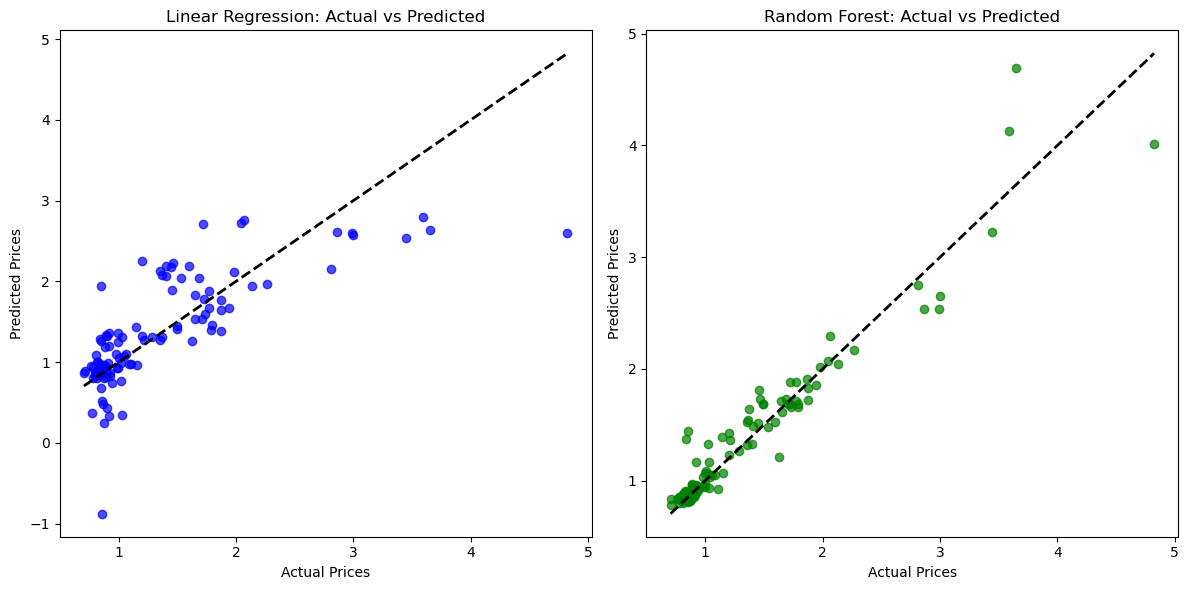

In [24]:
import matplotlib.pyplot as plt

# Scatter plot for Linear Regression
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.scatter(y_test, y_lr, alpha=0.7, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Linear Regression: Actual vs Predicted')

# Scatter plot for Random Forest
plt.subplot(1, 2, 2)
plt.scatter(y_test, y_rf, alpha=0.7, color='green')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Random Forest: Actual vs Predicted')

plt.tight_layout()
plt.show()

### Perform cross validation for feature selection

Cross-Validation RMSE Scores: [0.15609854 0.15905046 0.48846786 0.56010119 1.01272632]
Mean Cross-Validation RMSE: 0.4752888716483941


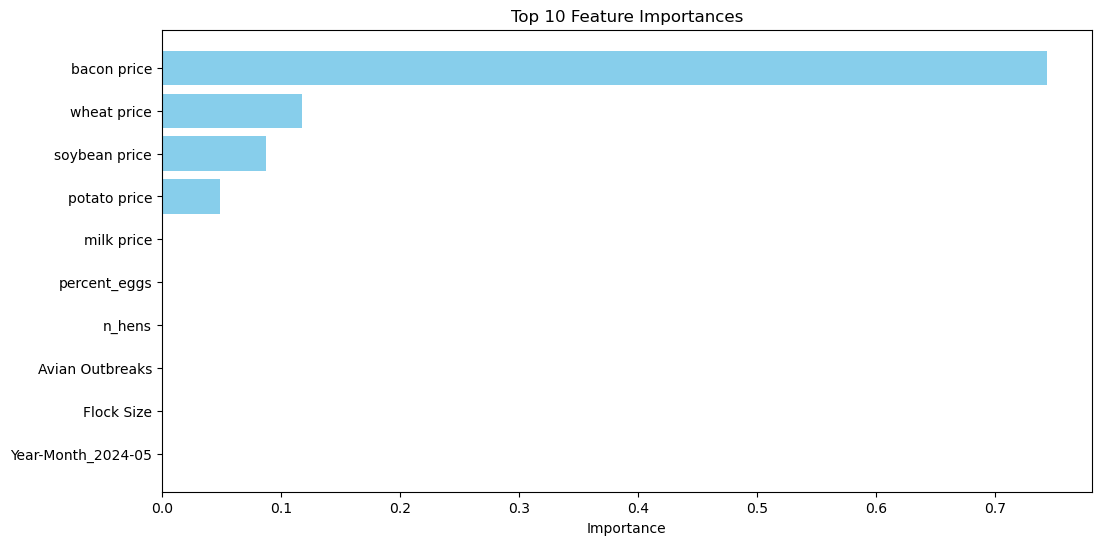

In [25]:
# Perform cross validation for feature selection
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

# Create a pipeline with scaling and feature selection
pipeline = Pipeline(steps=[
    ('scaler', StandardScaler()),
    ('feature_selection', SelectFromModel(RandomForestRegressor(random_state=42))),
    ('model', RandomForestRegressor(random_state=42))
])
# Perform cross-validation
cv_scores = cross_val_score(pipeline, X_imputed, y_clean, cv=5, scoring='neg_mean_squared_error')
# Convert negative MSE to RMSE
rmse_scores = (-cv_scores) ** 0.5
# Print the RMSE scores for each fold
print("Cross-Validation RMSE Scores:", rmse_scores)
# Print the mean RMSE score
print("Mean Cross-Validation RMSE:", rmse_scores.mean())
# Feature importance from Random Forest model
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_imputed, y_clean)
importances = rf_model.feature_importances_
feature_names = X_imputed.columns
importances_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
importances_df = importances_df.sort_values(by='Importance', ascending=False)
importances_df.head(10)
# Plot feature importances
plt.figure(figsize=(12, 6))
plt.barh(importances_df['Feature'][:10], importances_df['Importance'][:10], color='skyblue')
plt.xlabel('Importance')
plt.title('Top 10 Feature Importances')
plt.gca().invert_yaxis()
plt.show()


In [26]:
# Export X and y to CSV files
X.to_csv('X.csv', index=False)
y.to_csv('y.csv', index=False)

### Retrain the model with only the top 3 most correlated features

Construct CART Model

In [27]:
#splitting into training ans test sets
X_train, X_test, y_train, y_test = train_test_split(X_imputed, y_clean, test_size=0.2, random_state=42)


In [28]:
from sklearn.tree import DecisionTreeRegressor

tree_model = DecisionTreeRegressor(max_depth = 4,random_state=42)
tree_model.fit(X_train, y_train)
y_pred = tree_model.predict(X_test)

In [29]:
def get_simple_labels(tree, feature_names):
    labels = []
    for i in range(tree.node_count):
        if tree.children_left[i] == tree.children_right[i]:
            price = tree.value[i][0][0]  # safely get the scalar from shape (1,1)
            labels.append(f"Predicted Price\n${price:.2f}")

        else:
            feature = feature_names[tree.feature[i]]
            price = tree.value[i][0][0]  # safely get the scalar from shape (1,1)
            labels.append(f"{feature}\n→ ${price:.2f}")
    return labels 
custom_labels = get_simple_labels(tree_model.tree_, X_imputed.columns)

In [33]:
from sklearn.metrics import mean_squared_error, r2_score

tree_mse = mean_squared_error(y_test, y_pred)
tree_r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {tree_mse:.2f}")
print(f"R-squared: {tree_r2:.2f}")

Mean Squared Error: 0.06
R-squared: 0.88


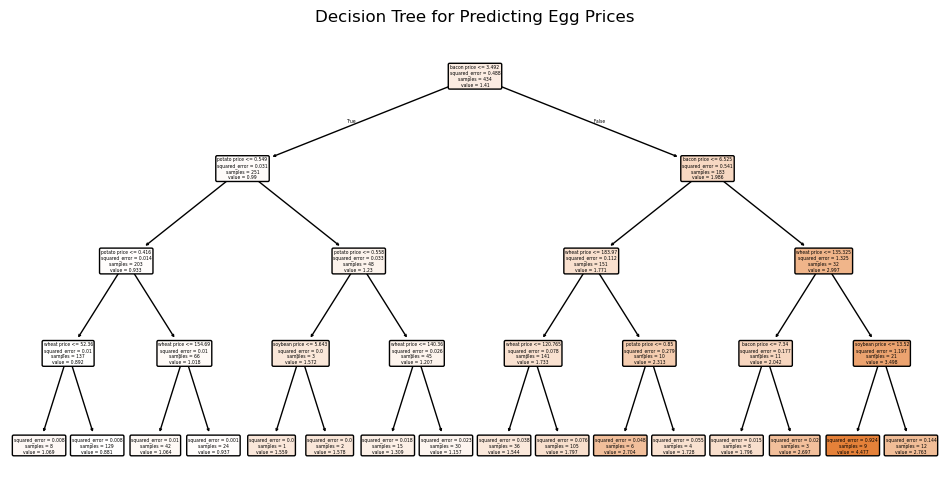

In [41]:
plt.figure(figsize=(12, 6))
plot_tree(tree_model, feature_names=X_imputed.columns, filled=True, rounded=True)
plt.title("Decision Tree for Predicting Egg Prices")
plt.show()

